<a href="https://colab.research.google.com/github/mnngit/100DML/blob/main/D32a_encoding_numerical_data_to_categorical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer


In [21]:
df = pd.read_csv('/content/drive/MyDrive/100DML/train.csv', usecols=['Age', 'Fare', 'Survived'])

In [22]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [24]:
df.shape

(891, 3)

In [25]:
df.dropna(inplace=True)

In [26]:
df.shape

(714, 3)

In [27]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [30]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [31]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6153846153846154

In [32]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6316901408450704

In [58]:
# Let's Discretize
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')

In [59]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [60]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [61]:
X_train_trf

array([[ 8.,  8.],
       [ 6.,  7.],
       [ 8.,  7.],
       ...,
       [11., 14.],
       [ 9.,  8.],
       [ 9.,  3.]])

In [62]:
trf.named_transformers_['first'].n_bins_

array([15])

In [63]:
trf.named_transformers_['first'].bin_edges_


array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [64]:
trf.named_transformers_['second'].bin_edges_


array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [65]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [66]:
output.head(2)

,age,age_trf,fare,fare_trf
328,31.0,8.0,20.5250,8.0
73,26.0,6.0,14.4542,7.0


In [67]:
output['age_labels'] = pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [68]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
278,7.0,1.0,29.125,10.0,"(6.0, 16.0]","(26.55, 31.275]"
283,19.0,3.0,8.050,3.0,"(16.0, 19.0]","(7.896, 8.158]"
423,28.0,7.0,14.400,6.0,"(25.0, 28.0]","(13.0, 14.454]"
393,23.0,5.0,113.275,14.0,"(21.0, 23.0]","(108.9, 512.329]"
152,55.5,14.0,8.050,3.0,"(54.0, 80.0]","(7.896, 8.158]"


In [69]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred=clf.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.6363636363636364

In [70]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), X,y,cv=10,scoring='accuracy'))

0.6331181533646322

In [77]:
def discretize(bins,strategy):
  kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
  kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

  trf = ColumnTransformer([
      ('first',kbin_age,[0]),
      ('second',kbin_fare,[1])
  ])

  X_trf = trf.fit_transform(X)
  print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  plt.hist(X['Age'])
  plt.title('Before')

  plt.subplot(122)
  plt.hist(X_trf[:,0], color='red')
  plt.title('After')

  plt.show()

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  plt.hist(X['Fare'])
  plt.title('Before')

  plt.subplot(122)
  plt.hist(X_trf[:,1], color='red')
  plt.title('After')

  plt.show()



0.6232981220657277


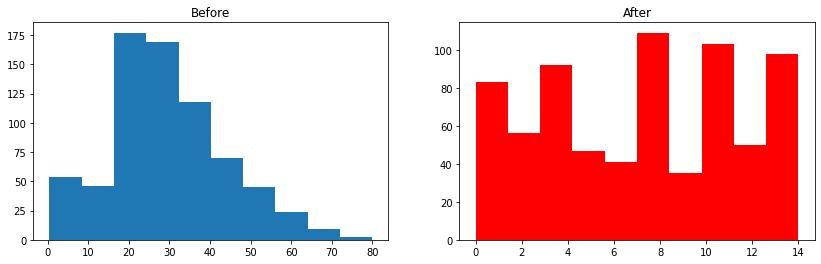

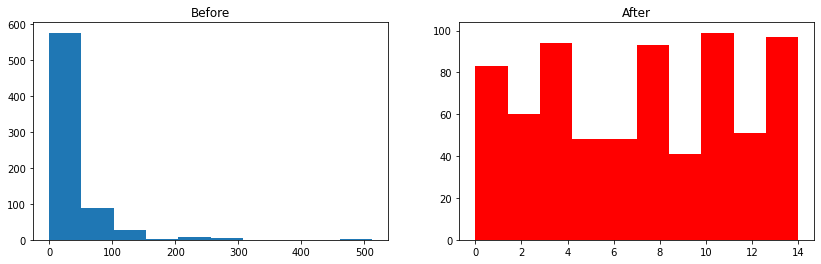

In [78]:
discretize(15,'quantile')

0.6316901408450704


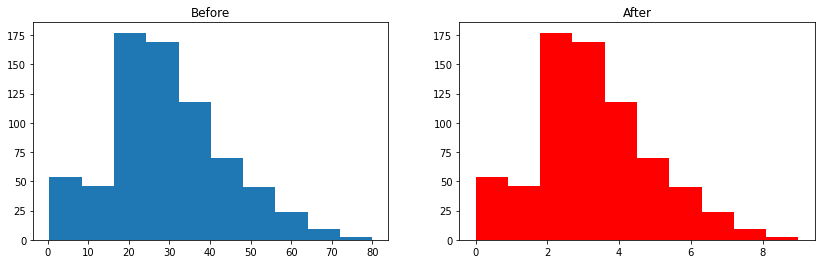

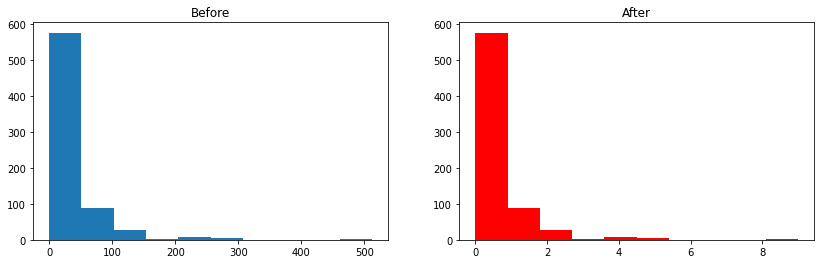

In [79]:
discretize(10,'uniform')

0.6303403755868544


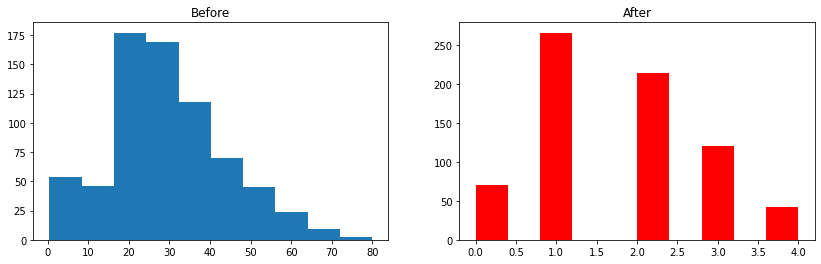

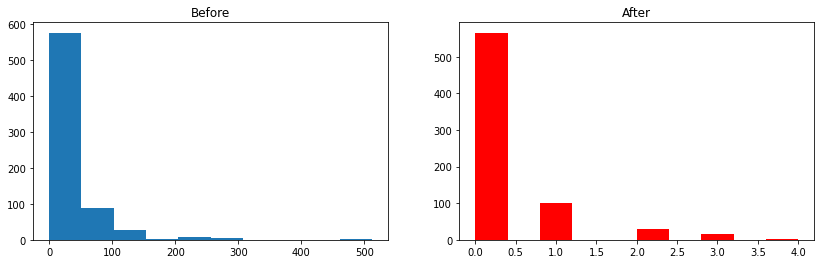

In [80]:
discretize(5,'kmeans')